In [8]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm


In [4]:

new_path = r'C:\Users\liaok\OneDrive\Desktop\毕设\data'

# 检查路径是否存在
if os.path.exists(new_path):
    os.chdir(new_path)
    print(f"工作目录已切换到：{new_path}")

工作目录已切换到：E:\Projects\bishe\data


### 导入数据

['ans', 'dec', 'images', 'pxscale', 'ra', 'redshift']


下载进度: 100%|██████████| 2500/2500 [9:38:02<00:00, 13.87s/张]  


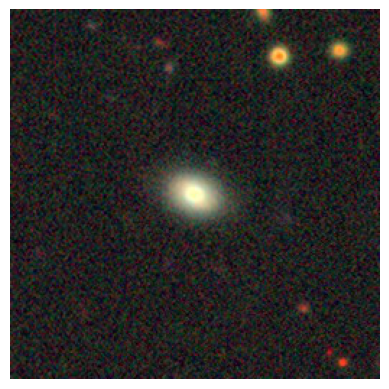

In [6]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import os

# 创建 data_ori 文件夹
if not os.path.exists('data_ori'):
    os.makedirs('data_ori')

# 打开文件
file = h5py.File('Galaxy10_DECals.h5', 'r')

# 查看文件中的数据集
print(list(file.keys()))

# 假设图像数据存储在名为 'images' 的数据集中
images = file['images']

# 随机选择2500个不重复的图像索引
num_images = len(images)  # 总图像数量
random_indices = random.sample(range(num_images), 2500)

# 使用 tqdm 显示进度条
for idx in tqdm(random_indices, desc='下载进度', unit='张', colour='blue'):
    # 提取图像
    image = images[idx]

    # 如果图像形状为 (256, 3, 256)，可以尝试以下转置方式
    if image.shape == (256, 3, 256):
        # 将 channels 移到最后一个维度，变成 (256, 256, 3)
        image = np.transpose(image, (0, 2, 1))

    # 显示图像
    plt.imshow(image)
    plt.axis('off')  # 关闭坐标轴

    # 保存图像到 data_ori 文件夹
    plt.savefig(f'data_ori/galaxy_image_{idx}.png', bbox_inches='tight', pad_inches=0)

file.close()

转换进度: 100%|██████████| 2500/2500 [00:19<00:00, 126.68张/s]

所有图片已转换为 .fit 格式并保存到 data_ori_fit 文件夹中。


In [10]:
print(images.dtype)  # 查看数据类型
print(images.shape)  # 查看数据形状
print(images.attrs)  # 查看数据集的属性

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement rascil (from versions: none)
ERROR: No matching distribution found for rascil


In [45]:
# 保存为 FITS 文件
# 提取第一个通道（假设是灰度图像）
fits_image = image[:, :, 0]  # 选择第一个颜色通道

# 创建一个 FITS 文件
hdu = fits.PrimaryHDU(fits_image)
hdu.writeto('galaxy_image_3.fit', overwrite=True)

file.close()